In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, collections, csv
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [118]:
data_path = 'PPG_FeatureSet_App3_'
names = ['abarna ', 'achu ', 'ameen', 'arivu', 'arun5th', 'bhuvana', 'chandan', 'christopher', 'devipriya', 'dharwish', 'divya', 'gayathriP', 'hari9thjan_PPG', 'hemaM', 'hemaY', 'indu', 'jerina', 'kesavan', 'kirthika', 'krishnaraja', 'lakshmi7thmar_PPG', 'mani9th', 'muthuvommal', 'neethu', 'nikil', 'nitesh', 'padmanaban', 'priya', 'ramesh', 'sathish', 'sathvik', 'sharmili', 'shaumik', 'sivagami', 'sobhana', 'srideviKVSS', 'srideviv', 'sumon', 'surendra', 'suresh', 'tharun', 'thiru', 'usha', 'yakub']

In [119]:
# This script concatenates the sheets (named 'ppg_#normal', 'ppg_#mild fatigue', 'ppg_#fatigue') of an Excel file into a single sheet. 
sheet_name = ['ppg_#normal', 'ppg_#mild fatigue', 'ppg_#fatigue']
numberOfSheets = 3 #Modify this. 
for name in range(len(names)):
    df = {k:[] for k in names}
    f = data_path+names[name]+'.xls' #This is the path to the Excel file  
    for i in range(0, numberOfSheets):
        data = pd.read_excel(f, sheet_name= sheet_name[i], header=None) #Modify the sheetname argument based on how your sheets are named
        df[names[name]].append(data)
    final = data_path+'csv'+names[name]+'.csv' #Path to the file in which new sheet will be saved.
    df[names[name]] = pd.concat(df[names[name]])
    df[names[name]] = df[names[name]].iloc[:, 1:]
    df[names[name]] = df[names[name]].dropna(how='all')
    df[names[name]] = df[names[name]].drop_duplicates()
    df[names[name]].to_csv(final)

In [120]:
features = ['mHR', 'stdHR', 'cvHR', 'RMSSD', 'pNN20', 'pNN30', 'pNN40', 'pNN50', 'LFPower', 'HFPower', 'TPower', 'LHRatio', 'class']
names = ['abarna ', 'achu ', 'ameen', 'arivu', 'arun5th', 'bhuvana', 'chandan', 'christopher', 'devipriya', 'dharwish', 'divya', 'gayathriP', 'hari9thjan_PPG', 'hemaM', 'hemaY', 'indu', 'jerina', 'kesavan', 'kirthika', 'krishnaraja', 'lakshmi7thmar_PPG', 'mani9th', 'muthuvommal', 'neethu', 'nikil', 'nitesh', 'padmanaban', 'priya', 'ramesh', 'sathish', 'sathvik', 'sharmili', 'shaumik', 'sivagami', 'sobhana', 'srideviKVSS', 'srideviv', 'sumon', 'surendra', 'suresh', 'tharun', 'thiru', 'usha', 'yakub']

In [121]:
df = {k:[] for k in names}
for name in range(len(names)):
    df[names[name]] = pd.read_csv(data_path+'csv'+names[name]+'.csv')
    df[names[name]].pop('Unnamed: 0')
    df[names[name]].columns = features
    df[names[name]] = df[names[name]].iloc[1: , :]
    df[names[name]] = df[names[name]].drop_duplicates()

In [122]:
for name in range(len(names)):
    df[names[name]] = df[names[name]].drop(['pNN30', 'pNN50'], axis=1)

In [123]:
scaler = StandardScaler()
scaled_names = ['scaled_'+names[i] for i in range(len(names))]
    
scaled_df = {k:[] for k in scaled_names}

In [124]:
features_12 = ['mHR', 'stdHR', 'cvHR', 'RMSSD', 'pNN20', 'pNN30', 'pNN40', 'pNN50', 'LFPower', 'HFPower', 'TPower', 'LHRatio']

In [125]:
for name in range(len(names)):
    scaler.fit(df[names[name]].drop('class', axis = 1))
    sc_transform = scaler.transform(df[names[name]].drop('class', axis = 1))
    scaled_df[scaled_names[name]] = pd.DataFrame(sc_transform)
scaled_df['scaled_achu ']
#     scaled_df[scaled_names[name]] = pd.DataFrame(scaled_df[scaled_names[name]], index = features_12)
extra_df = pd.concat(scaled_df)
extra_df

0         1         2  ...         7         8         9
scaled_abarna  0   1.138877  0.477659 -0.448928  ...  0.250961  0.392913  0.428888
               1   0.775471  1.130361 -1.017978  ...  0.502543  0.347069 -0.143569
               2   0.754425  1.151302 -1.035578  ...  0.676116  0.270903 -0.568641
               3   0.932362  1.176980 -1.031178  ...  0.833824  0.257570 -0.805255
               4   1.227884  0.844070 -0.742253  ...  0.837452  0.232609 -0.914004
...                     ...       ...       ...  ...       ...       ...       ...
scaled_yakub   46  0.818408 -1.356047  2.154705  ... -0.845048 -0.476085 -0.028823
               47  0.871025 -1.302458  1.914589  ... -0.790544 -0.459362 -0.189385
               48  0.800480 -1.418599  2.480267  ... -0.730027 -0.440194 -0.224757
               49  0.343258 -1.166950  1.373129  ... -0.618542 -0.415207 -0.406380
               50  0.767493 -1.378369  2.261398  ... -0.572133 -0.404150 -0.432420

[2051 rows x 10 columns]

In [126]:
for name in range(len(names)):
  scaled_df[scaled_names[name]].index = pd.RangeIndex(start=1, stop=len(scaled_df[scaled_names[name]])+1, step=1)
  scaled_df[scaled_names[name]]['class'] = df[names[name]]['class']
scaled_df['scaled_bhuvana']


,0,1,2,3,4,5,6,7,8,9,class
1,-0.073838,0.058313,-0.374228,0.378139,-0.188961,-0.127527,-0.696136,-0.842731,-0.734454,-0.932118,normal
2,-0.269013,0.296082,-0.579584,0.230102,-0.113676,-0.115539,-0.678187,-0.789595,-0.707237,-0.867278,normal
3,-0.345475,0.459775,-0.698175,0.367458,0.256885,0.316150,-0.591243,-0.556472,-0.593212,-0.714905,normal
4,-0.410441,0.614979,-0.800351,0.826466,0.531895,0.650566,-0.430162,-0.103538,-0.382010,-0.649347,normal
5,-0.353776,0.538325,-0.748425,0.485053,0.589867,0.674347,-0.145929,0.598698,-0.032750,-0.577919,normal
6,-1.260512,1.782713,-1.383590,1.655991,0.397986,0.773182,1.502231,2.366606,2.022443,0.006419,normal
7,-0.996974,1.532838,-1.277394,1.486893,0.095771,0.452810,1.817211,2.193420,2.131426,0.264928,normal
8,-1.126002,1.559409,-1.297159,1.519659,0.181388,0.390918,2.183459,2.184797,2.297478,0.490719,normal
9,-1.037317,1.530766,-1.279739,1.475792,0.069725,0.250102,2.466528,2.206775,2.421799,0.648999,normal
10,-0.794424,1.274155,-1.160143,1.212259,-0.220961,-0.054087,2.648229,2.299914,2.504429,0.701750,normal


In [127]:
new_df = pd.concat(scaled_df)
new_df

0         1         2  ...         8         9   class
scaled_abarna  1   1.138877  0.477659 -0.448928  ...  0.392913  0.428888  normal
               2   0.775471  1.130361 -1.017978  ...  0.347069 -0.143569  normal
               3   0.754425  1.151302 -1.035578  ...  0.270903 -0.568641  normal
               4   0.932362  1.176980 -1.031178  ...  0.257570 -0.805255  normal
               5   1.227884  0.844070 -0.742253  ...  0.232609 -0.914004  normal
...                     ...       ...       ...  ...       ...       ...     ...
scaled_yakub   47  0.818408 -1.356047  2.154705  ... -0.476085 -0.028823  normal
               48  0.871025 -1.302458  1.914589  ... -0.459362 -0.189385  normal
               49  0.800480 -1.418599  2.480267  ... -0.440194 -0.224757  normal
               50  0.343258 -1.166950  1.373129  ... -0.415207 -0.406380  normal
               51  0.767493 -1.378369  2.261398  ... -0.404150 -0.432420  normal

[2051 rows x 11 columns]

In [128]:
new_df["class"].replace("mild fatigue", "fatigue", inplace= True)

In [129]:
new_df["class"].replace("normal", 0, inplace= True)
new_df["class"].replace("fatigue", 1, inplace= True)
new_df

0         1         2  ...         8         9  class
scaled_abarna  1   1.138877  0.477659 -0.448928  ...  0.392913  0.428888      0
               2   0.775471  1.130361 -1.017978  ...  0.347069 -0.143569      0
               3   0.754425  1.151302 -1.035578  ...  0.270903 -0.568641      0
               4   0.932362  1.176980 -1.031178  ...  0.257570 -0.805255      0
               5   1.227884  0.844070 -0.742253  ...  0.232609 -0.914004      0
...                     ...       ...       ...  ...       ...       ...    ...
scaled_yakub   47  0.818408 -1.356047  2.154705  ... -0.476085 -0.028823      0
               48  0.871025 -1.302458  1.914589  ... -0.459362 -0.189385      0
               49  0.800480 -1.418599  2.480267  ... -0.440194 -0.224757      0
               50  0.343258 -1.166950  1.373129  ... -0.415207 -0.406380      0
               51  0.767493 -1.378369  2.261398  ... -0.404150 -0.432420      0

[2051 rows x 11 columns]

In [130]:
new_df.to_csv('approach3combined.csv', index=False)

In [131]:
y=new_df.iloc[:,-1].values
y
y.size
# for name in range(len(names)):
#   y=df[names[name]].iloc[:,-1].values


# y = dataset.iloc[:, -1].values

2051

In [132]:
X = new_df.iloc[:, :-1].values
X


array([[ 1.13887741,  0.47765944, -0.44892807, ...,  0.25096109,
         0.3929125 ,  0.42888798],
       [ 0.77547068,  1.13036091, -1.01797831, ...,  0.50254327,
         0.34706945, -0.14356864],
       [ 0.75442497,  1.15130246, -1.03557781, ...,  0.67611636,
         0.27090301, -0.56864056],
       ...,
       [ 0.8004803 , -1.41859894,  2.48026711, ..., -0.73002711,
        -0.44019401, -0.22475703],
       [ 0.34325766, -1.16694964,  1.37312892, ..., -0.61854201,
        -0.41520656, -0.40638003],
       [ 0.76749276, -1.37836919,  2.26139828, ..., -0.57213313,
        -0.40415037, -0.43242029]])

In [133]:
y[1:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [134]:
X.shape, y.shape

((2051, 10), (2051,))

Oversampling

In [135]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [136]:
X_res.shape,y_res.shape

((2316, 10), (2316,))

In [137]:
#ML BEGINS

In [138]:

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.30)
y_train

array([0, 0, 0, ..., 1, 1, 0])

In [139]:

classifierSVM = SVC(kernel = 'rbf', random_state = 0, probability=True)
classifierSVM.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [140]:
y_pred = classifierSVM.predict(X_test)

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 0]
 ...
 [0 0]
 [1 1]
 [0 1]]


In [141]:

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[218 135]
 [111 231]]


0.6460431654676259

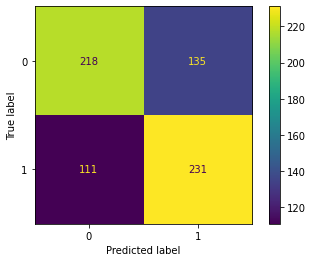

In [142]:
plot_confusion_matrix(classifierSVM, X_test, y_test, values_format='')  
plt.show() 

In [143]:
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

           0       0.66      0.62      0.64       353
           1       0.63      0.68      0.65       342

    accuracy                           0.65       695
   macro avg       0.65      0.65      0.65       695
weighted avg       0.65      0.65      0.65       695



In [151]:
#Stratified Cross Validation
skfold=StratifiedKFold(n_splits=20)
classifier = SVC(kernel = 'rbf')
scores=cross_val_score(classifier,X_res,y_res,cv=skfold)
print(np.mean(scores)*100)

58.952023988006


In [152]:
scores

array([0.44827586, 0.59482759, 0.6637931 , 0.5       , 0.50862069,
       0.54310345, 0.72413793, 0.5       , 0.52586207, 0.50862069,
       0.5862069 , 0.40517241, 0.51724138, 0.69827586, 0.59482759,
       0.78448276, 0.7826087 , 0.55652174, 0.79130435, 0.55652174])

In [153]:
max(scores)*100, min(scores)*100

(79.13043478260869, 40.51724137931034)

In [154]:
def knn_find_k(X_train, y_train, X_test, y_test, name):
    error_rates = []

    for a in range(1, 40):
        k = a
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        error_rates.append(np.mean(np.asarray(y_test, dtype=np.float64, order ='C') - preds))

    plt.figure(figsize=(10, 7))
    plt.plot(range(1,40),error_rates,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.title(name+'- Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.savefig(name+'- ErrorRate_vs_KValue.png')

In [155]:
def knn_accuracy(X_train, y_train, X_test, y_test, name):
    acc = []
    # Will take some time

    for i in range(1,40):
        neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
        yhat = neigh.predict(X_test)
        acc.append(accuracy_score(y_test, yhat))

    plt.figure(figsize=(10,6))
    plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
             marker='o',markerfacecolor='red', markersize=10)
    plt.title(name+'- accuracy vs. KValue')
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.savefig(name+'- accuracy vs. KValue.png')

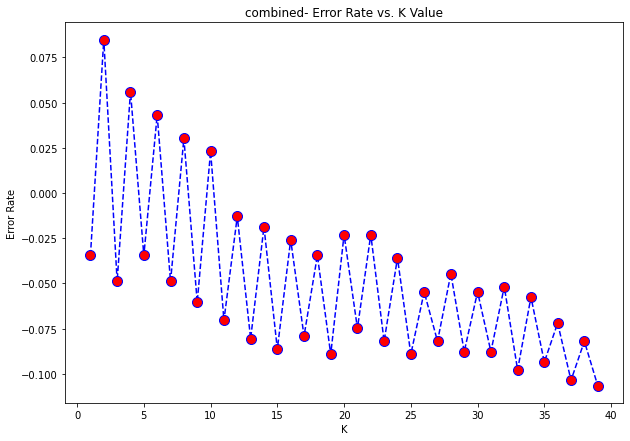

In [156]:
knn_find_k(X_train, y_train, X_test, y_test, 'combined')

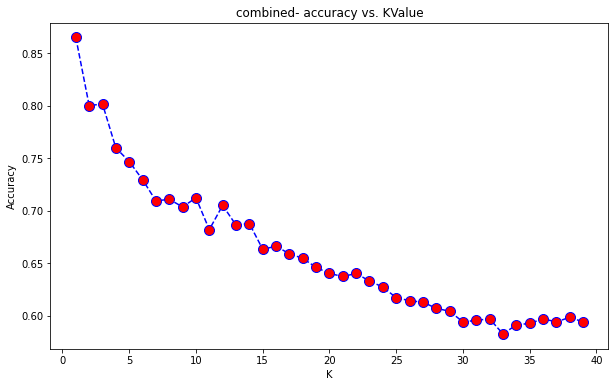

In [157]:
knn_accuracy(X_train, y_train, X_test, y_test, 'combined')

[[235 118]
 [ 84 258]]
              precision    recall  f1-score   support

           0       0.74      0.67      0.70       353
           1       0.69      0.75      0.72       342

    accuracy                           0.71       695
   macro avg       0.71      0.71      0.71       695
weighted avg       0.71      0.71      0.71       695



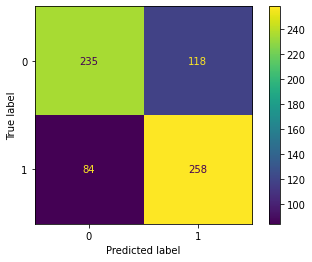

In [158]:
knn = KNeighborsClassifier(n_neighbors=7)    # change n_neighbours according to the graph
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

# from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, multilabel_confusion_matrix
cf_matrix = confusion_matrix(y_test, preds)
print(cf_matrix)
print(classification_report(y_test, preds))

plot_confusion_matrix(knn, X_test, y_test, values_format = '')

In [159]:

def ensemble_model(X_train,X_test, Y_train, Y_test, sampling_technique):
    MLA = [XGBClassifier(n_estimators=200)]
    MLA_columns = []
    MLA_compare = pd.DataFrame(columns = MLA_columns)
    row_index = 0
    for alg in MLA:
        # MLA_name = alg._class.name_ + sampling_technique
        MLA_name=sampling_technique
        print(MLA_name)
        predicted = alg.fit(X_train, Y_train).predict(X_test)        
        MLA_compare.loc[row_index,'Model Name'] = MLA_name
        MLA_compare.loc[row_index, 'Train Accuracy'] = alg.score(X_train, Y_train)
        MLA_compare.loc[row_index, 'Test Accuracy'] = alg.score(X_test, Y_test)
        MLA_compare.loc[row_index, 'Precision'] = precision_score(Y_test, predicted, average='micro')
        MLA_compare.loc[row_index, 'Recall'] = recall_score(Y_test, predicted, average='micro')
        MLA_compare.loc[row_index, 'F1 score'] = f1_score(Y_test, predicted, average='micro')
        row_index+=1
        print(classification_report(Y_test, predicted))
        plot_confusion_matrix(alg, X_test, Y_test, values_format = '')
    MLA_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
    return MLA_compare

XGBOOST
              precision    recall  f1-score   support

           0       0.71      0.70      0.70       353
           1       0.69      0.70      0.70       342

    accuracy                           0.70       695
   macro avg       0.70      0.70      0.70       695
weighted avg       0.70      0.70      0.70       695



,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,XGBOOST,0.905614,0.699281,0.699281,0.699281,0.699281


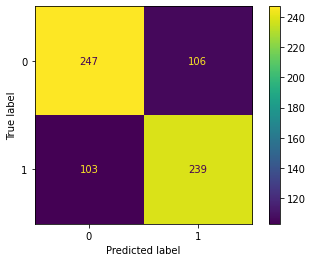

In [160]:
ensemble_model(X_train,X_test, y_train, y_test, 'XGBOOST')

In [161]:
# RF

In [162]:
classifierRF= RandomForestClassifier(n_estimators=150, random_state= np.random)
classifierRF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False,
                       random_state=<module 'numpy.random' from '/usr/local/lib/python3.7/dist-packages/numpy/random/__init__.py'>,
                       verbose=0, warm_start=False)

In [163]:
y_pred = classifierRF.predict(X_test)

In [164]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[294  59]
 [ 64 278]]


0.823021582733813

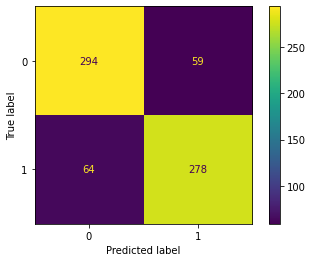

In [165]:
plot_confusion_matrix(classifierRF, X_test, y_test, values_format='')  
plt.show() 

In [166]:
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       353
           1       0.82      0.81      0.82       342

    accuracy                           0.82       695
   macro avg       0.82      0.82      0.82       695
weighted avg       0.82      0.82      0.82       695



In [167]:
# cross validation

In [168]:
skf = StratifiedKFold(n_splits = 10, shuffle = True)
lst,lst2 = [],[]

for train_index,test_index in skf.split(X_res,y_res):
    X_train_fold, X_test_fold = X_res[train_index], X_res[test_index]
    Y_train_fold, Y_test_fold = y_res[train_index], y_res[test_index]
    classifierRF.fit(X_train_fold, Y_train_fold)
    lst.append(classifierRF.score(X_test_fold, Y_test_fold))
    lst2.append(classifierRF.score(X_train_fold, Y_train_fold))
    Y_pred2= classifierRF.predict(X_test_fold)
    print("Testing accuracy")
    print('The confusion matrix is: \n',confusion_matrix(Y_test_fold,Y_pred2))
    print('\n the accuracy score is: ', accuracy_score(Y_test_fold,Y_pred2))
    print('\n\n',classification_report(Y_test_fold,Y_pred2))

print('training accuracy ',lst2)
print('List of possible accuracy: ',lst)
print('Max: ', max(lst))
print('Min: ', min(lst))
print('Mean: ', np.mean(lst))

Testing accuracy
The confusion matrix is: 
 [[101  15]
 [ 15 101]]

 the accuracy score is:  0.8706896551724138


               precision    recall  f1-score   support

           0       0.87      0.87      0.87       116
           1       0.87      0.87      0.87       116

    accuracy                           0.87       232
   macro avg       0.87      0.87      0.87       232
weighted avg       0.87      0.87      0.87       232

Testing accuracy
The confusion matrix is: 
 [[95 21]
 [21 95]]

 the accuracy score is:  0.8189655172413793


               precision    recall  f1-score   support

           0       0.82      0.82      0.82       116
           1       0.82      0.82      0.82       116

    accuracy                           0.82       232
   macro avg       0.82      0.82      0.82       232
weighted avg       0.82      0.82      0.82       232

Testing accuracy
The confusion matrix is: 
 [[ 95  21]
 [ 12 104]]

 the accuracy score is:  0.8577586206896551


      

In [169]:
#NB

In [170]:

gnb = GaussianNB()

In [171]:


# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=20, shuffle=True)
lst_accu_stratified = []
predicted_targets = np.array([])
actual_targets = np.array([])

for train_index, test_index in skf.split(X_res, y_res):
      
      X_train_fold, X_test_fold = X_res[train_index], X_res[test_index]
      y_train_fold, y_test_fold = y_res[train_index], y_res[test_index]
      classifier = gnb.fit(X_train_fold, y_train_fold)
      y_pred = gnb.predict(X_test_fold)
      lst_accu_stratified.append(gnb.score(X_test_fold, y_test_fold))
      #concatenating the confusion matrices
      predicted_targets = np.append(predicted_targets, y_pred)
      actual_targets = np.append(actual_targets, y_test_fold)
      

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')

List of possible accuracy: [0.6120689655172413, 0.5775862068965517, 0.5258620689655172, 0.4827586206896552, 0.5862068965517241, 0.5517241379310345, 0.5862068965517241, 0.5, 0.5517241379310345, 0.47413793103448276, 0.5689655172413793, 0.46551724137931033, 0.5775862068965517, 0.5689655172413793, 0.5258620689655172, 0.5086206896551724, 0.5391304347826087, 0.591304347826087, 0.5826086956521739, 0.4608695652173913]

Maximum Accuracy: 61.206896551724135 %

Minimum Accuracy: 46.08695652173913 %

Overall Accuracy: 54.18853073463268 %


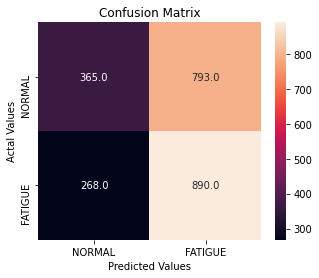

In [172]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(actual_targets, predicted_targets)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,index = ['NORMAL','FATIGUE'], 
                     columns = ['NORMAL','FATIGUE'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()